In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the dataset
mydata = pd.read_csv(r"C:\Users\Rahul-Akshay\Desktop\bank-additional\bank-additional-full.csv",sep = ";")

In [3]:
mydata.shape

(41188, 21)

In [4]:
mydata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
mydata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
#checking for null values
mydata.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

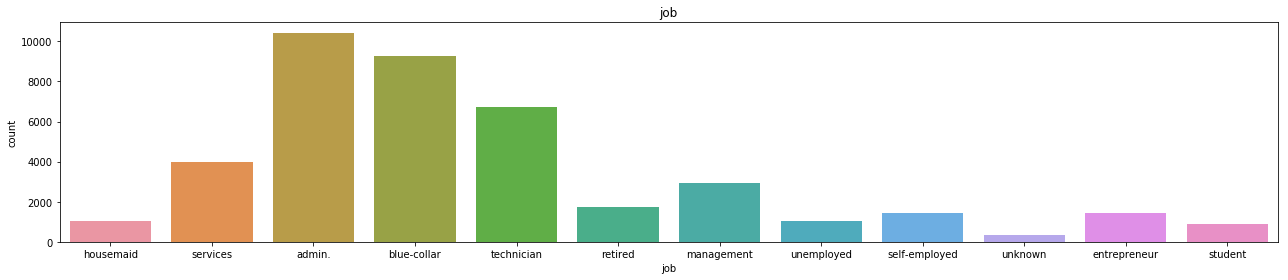

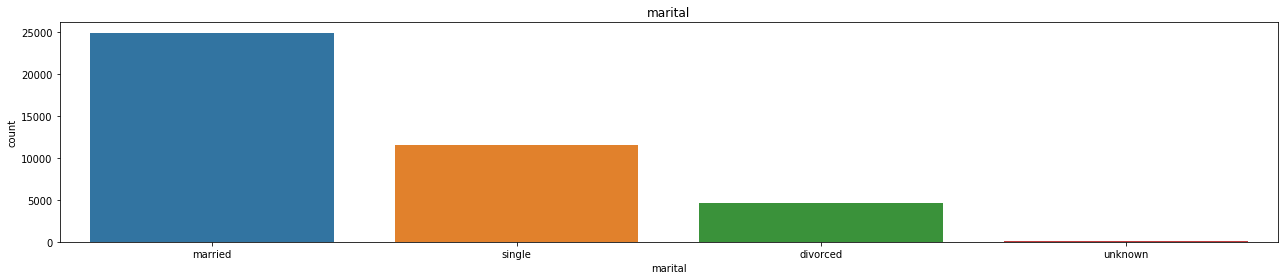

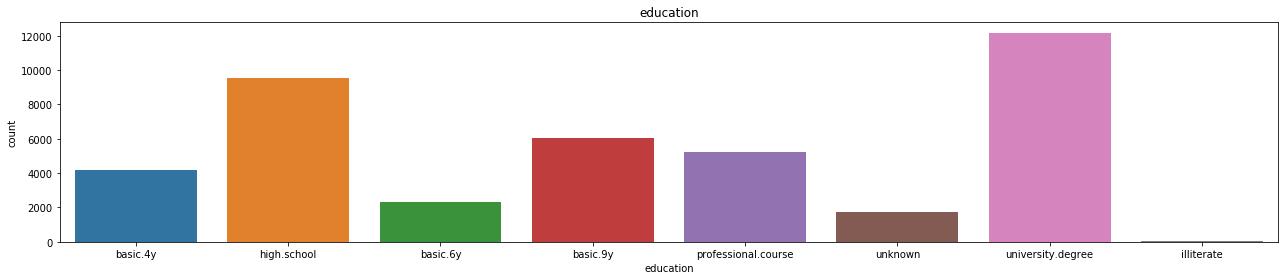

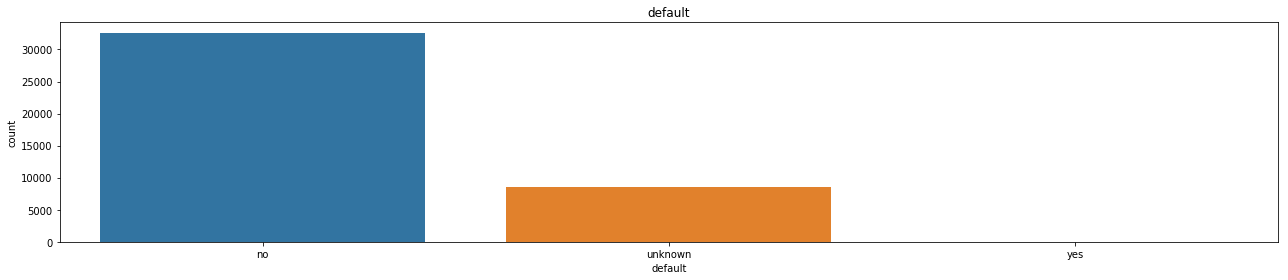

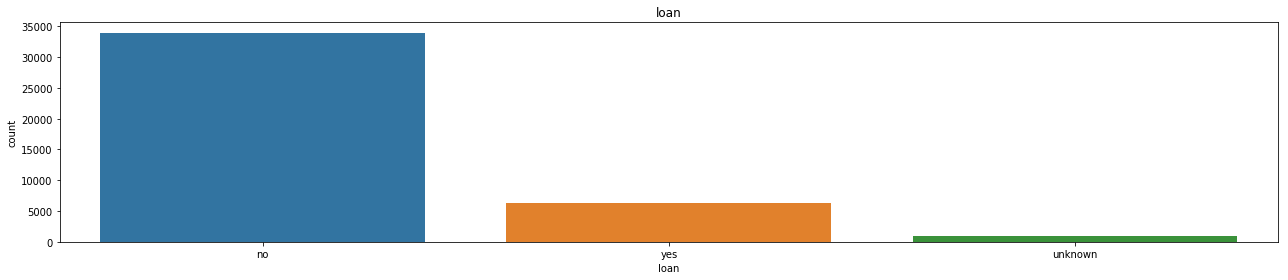

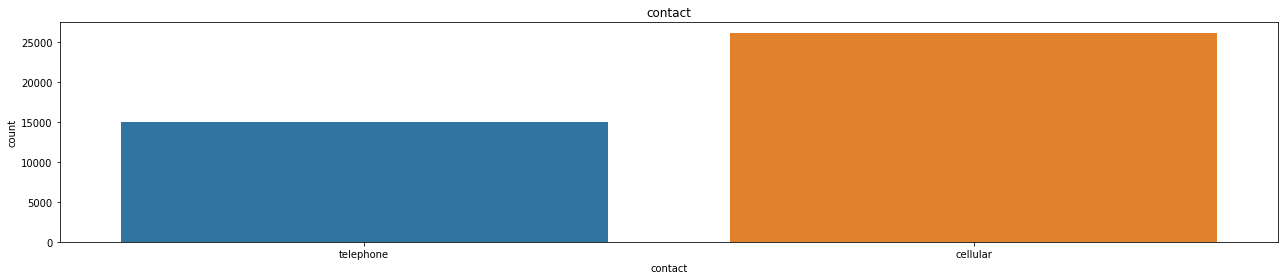

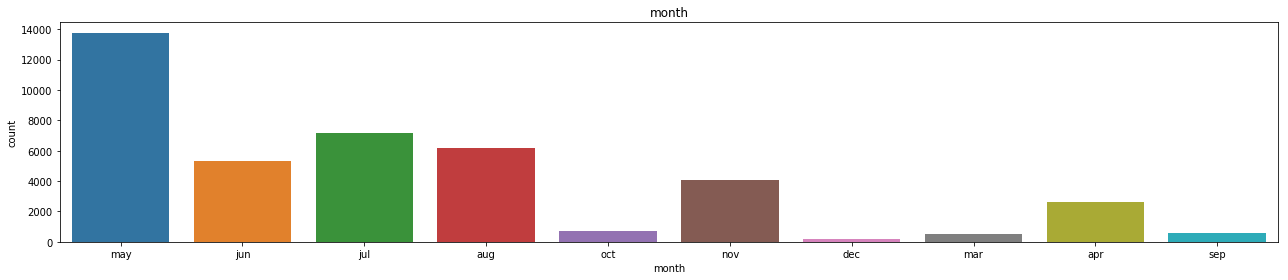

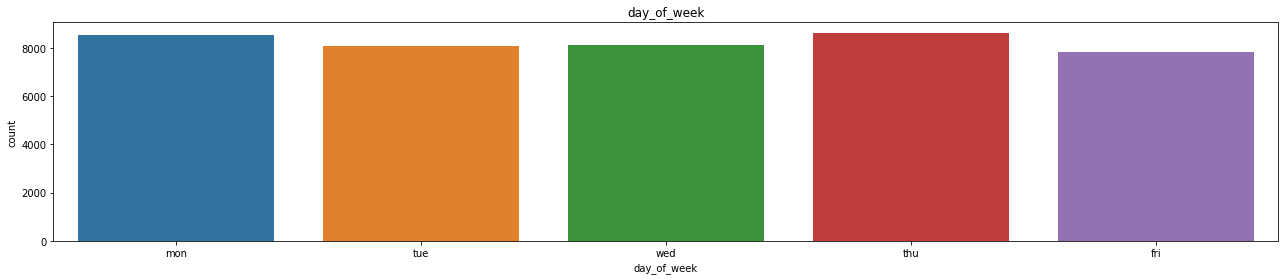

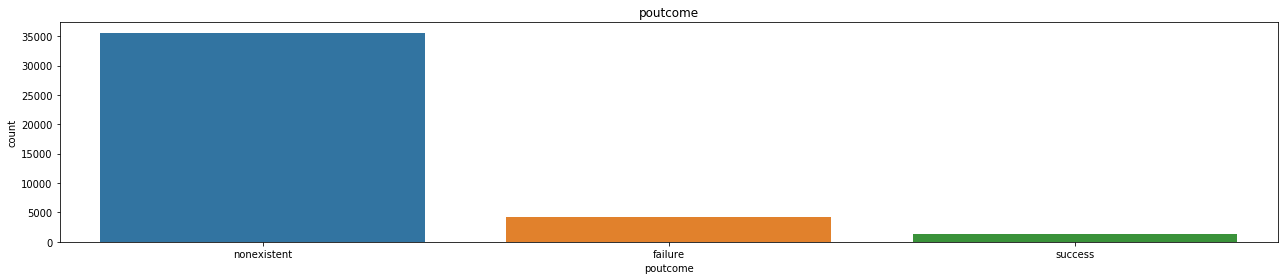

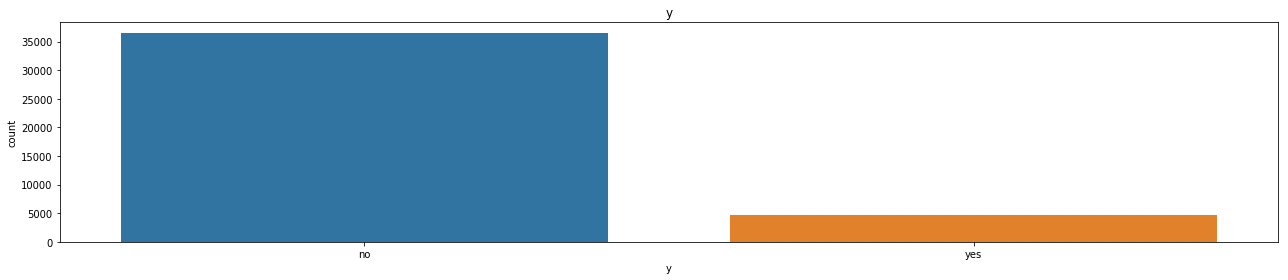

In [8]:
#plotting categorical data's
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(18,4))
    #sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    sns.countplot(x=col,data=mydata)
    
    plt.title(col)
    plt.tight_layout()

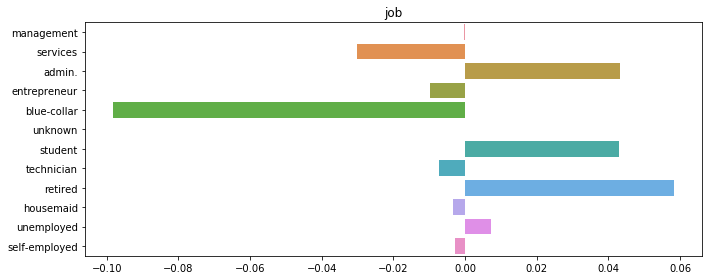

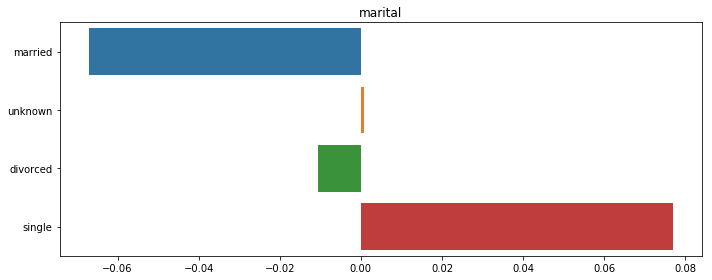

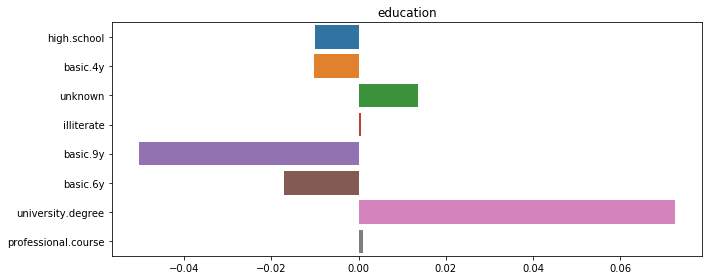

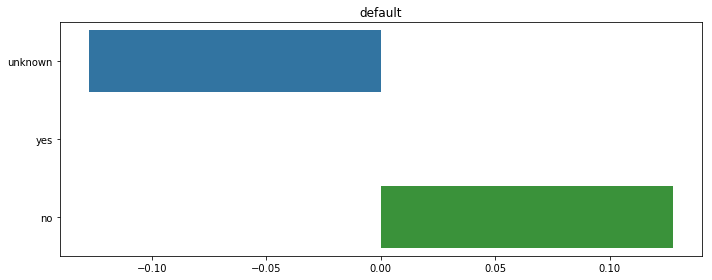

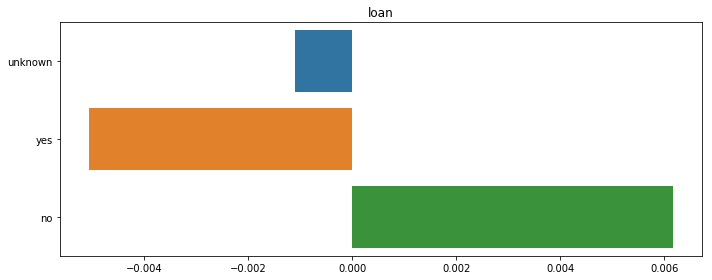

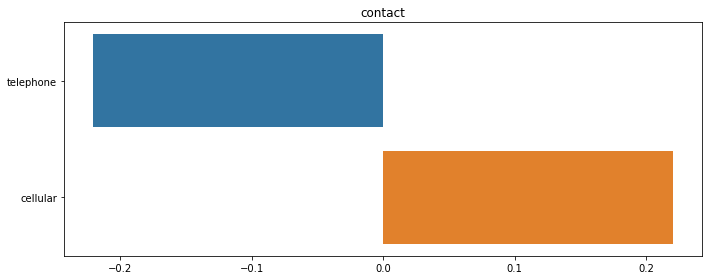

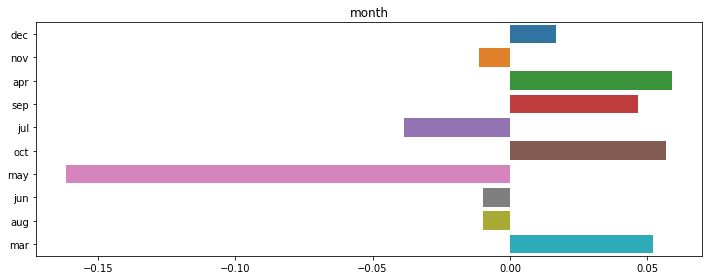

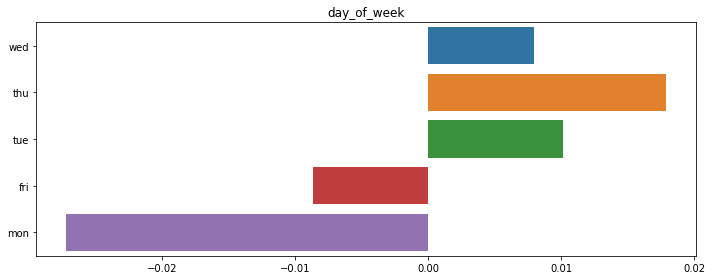

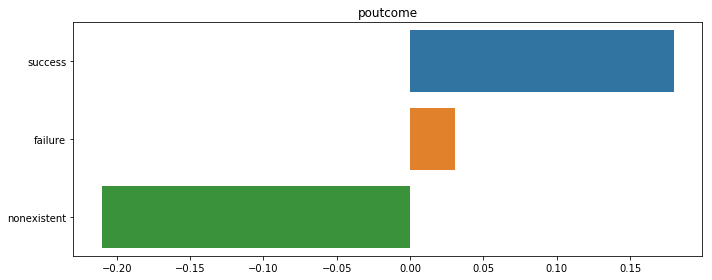

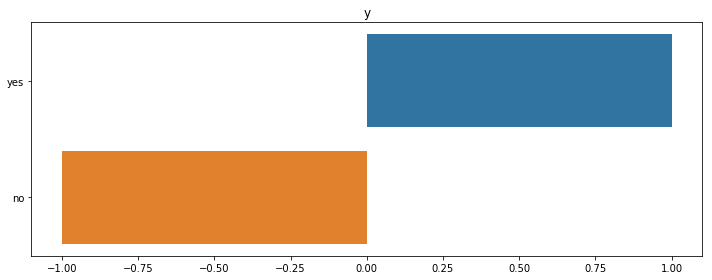

In [9]:
#plotting categorical data but plotting them according to our y i.e our output
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    positive_counts = mydata.loc[mydata.y.values == 'yes', col].value_counts() 
    negative_counts = mydata.loc[mydata.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(positive_counts.index) + list(negative_counts.index)))
    
    #Counts of how often each outcome was recorded.
    pos = (mydata.y.values == 'yes').sum()
    neg = (mydata.y.values == 'no').sum()
    
    positive_counts = positive_counts.to_dict()
    negative_counts = negative_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [positive_counts.get(k, 0) / pos - negative_counts.get(k, 0) / neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

In [10]:
features_columns=['job','education', 'default', 'housing', 'loan',
           'month', 'day_of_week', 'duration', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m','y']

In [11]:
#Encoding the categorical data
for col in mydata.columns:
    if mydata[col].dtype==object:
           mydata[col]=mydata[col].astype('category')
           mydata[col]=mydata[col].cat.codes

In [12]:
mydata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [13]:
#taking output data 
Y = mydata['y']

In [14]:
#remoivng output variable from mydata
mydata =  mydata.drop(['y'],axis =1)
X = mydata

In [15]:
# Rescaling data (between 0 and 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.481 0.273 0.333 0.    0.    0.    0.    1.    0.667 0.25  0.053 0.
  1.    0.    0.5   0.938 0.699 0.603 0.957 0.86 ]
 [0.494 0.636 0.333 0.429 0.5   0.    0.    1.    0.667 0.25  0.03  0.
  1.    0.    0.5   0.938 0.699 0.603 0.957 0.86 ]
 [0.247 0.636 0.333 0.429 0.    1.    0.    1.    0.667 0.25  0.046 0.
  1.    0.    0.5   0.938 0.699 0.603 0.957 0.86 ]
 [0.284 0.    0.333 0.143 0.    0.    0.    1.    0.667 0.25  0.031 0.
  1.    0.    0.5   0.938 0.699 0.603 0.957 0.86 ]
 [0.481 0.636 0.333 0.429 0.    0.    1.    1.    0.667 0.25  0.062 0.
  1.    0.    0.5   0.938 0.699 0.603 0.957 0.86 ]]


C:\Users\Rahul-Akshay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [16]:
#Splitting the data
from sklearn.model_selection import train_test_split
#X = features_columns_df.iloc[:,0:15]
#Y = features_columns_df.iloc[:,15]
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state = 7)

In [17]:
#Importing the required libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [18]:
#Random Forrest Classifier
rf = RandomForestClassifier(random_state = 42)  # random_state is the seed used by the random number generator
#fitting the model
model1 = rf.fit(X_train, y_train)

C:\Users\Rahul-Akshay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
model1.score(X_test,y_test)

0.9072590434571498

In [20]:
#Creating the Classification_report
from sklearn.metrics import classification_report
# Model Prediction 
predictions = model1.predict(X_test)
#Print the classification report
print(classification_report(y_true =y_test,y_pred = predictions))
np.sum(predictions)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7333
           1       0.61      0.42      0.50       905

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.77      0.70      0.72      8238
weighted avg       0.90      0.91      0.90      8238



625

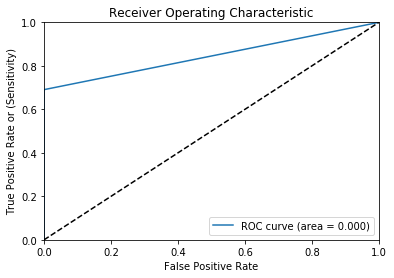

In [21]:
#Plotting the Roc and Auc Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_true=sorted(y_test)
y_score=sorted(predictions)
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(y_true, y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


In [22]:
#XGB Classifier
# fitting model on training data
model2 = XGBClassifier()
model2.fit(X_train, y_train)
# make predictions for test data
y_pred2 = model2.predict(X_test)
predictions = [round(value) for value in y_pred2]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.61%


In [23]:
#Creating the Classification_report
from sklearn.metrics import classification_report
# Model Prediction 
predictions = model2.predict(X_test)
#Print the classification report
print(classification_report(y_true =y_test,y_pred = predictions))
np.sum(predictions)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7333
           1       0.65      0.50      0.57       905

   micro avg       0.92      0.92      0.92      8238
   macro avg       0.80      0.73      0.76      8238
weighted avg       0.91      0.92      0.91      8238



696

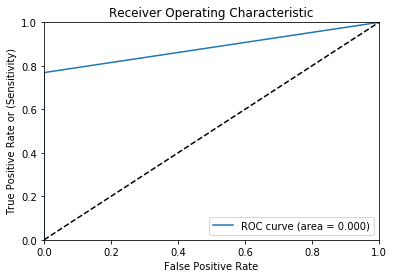

In [24]:
#roc curves
y_true=sorted(y_test)
y_score=sorted(predictions)
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(y_true, y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [25]:
#GaussianNB

# fit model on training data
model3 = GaussianNB()
model3.fit(X_train, y_train)
# make predictions for test data
y_pred3 = model3.predict(X_test)
predictions = [round(value) for value in y_pred3]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.43%


In [26]:
#Creating the Classification_report
from sklearn.metrics import classification_report
# Model Prediction 
predictions = model3.predict(X_test)
#Print the classification report
print(classification_report(y_true =y_test,y_pred = predictions))
np.sum(predictions)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7333
           1       0.37      0.59      0.46       905

   micro avg       0.84      0.84      0.84      8238
   macro avg       0.66      0.73      0.68      8238
weighted avg       0.88      0.84      0.86      8238



1452

In [28]:
#Logistic Regression
# fit model no training data
model4 = LogisticRegression()
model4.fit(X_train, y_train)
# make predictions for test data
y_pred4 = model4.predict(X_test)
predictions = [round(value) for value in y_pred4]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\Rahul-Akshay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 90.93%


In [29]:
#Creating the Classification_report
from sklearn.metrics import classification_report
# Model Prediction 
predictions = model4.predict(X_test)
#Print the classification report
print(classification_report(y_true =y_test,y_pred = predictions))
np.sum(predictions)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7333
           1       0.64      0.39      0.49       905

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.79      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



552

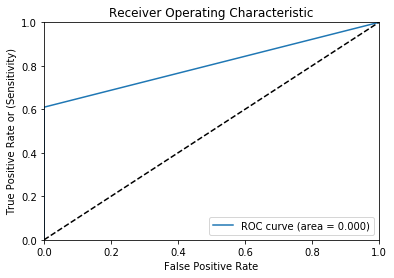

In [30]:
y_true=sorted(y_test)
y_score=sorted(predictions)
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(y_true, y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [31]:
#KNN Classifier

model5 = KNeighborsClassifier()
model5.fit(X_train, y_train)
# make predictions for test data
y_pred5 = model5.predict(X_test)
predictions = [round(value) for value in y_pred5]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.52%


In [32]:
#Creating the Classification_report
from sklearn.metrics import classification_report
# Model Prediction 
predictions = model5.predict(X_test)
#Print the classification report
print(classification_report(y_true =y_test,y_pred = predictions))
np.sum(predictions)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7333
           1       0.58      0.50      0.54       905

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.76      0.73      0.74      8238
weighted avg       0.90      0.91      0.90      8238



782

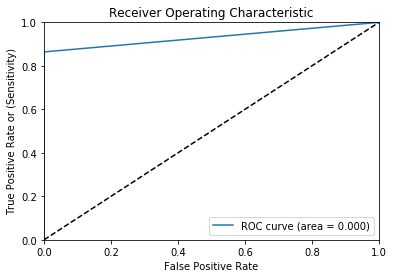

In [33]:
y_true=sorted(y_test)
y_score=sorted(predictions)
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(y_true, y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [34]:
#SVC

model6 = SVC()
model6.fit(X_train, y_train)
# make predictions for test data
y_pred6 = model6.predict(X_test)
predictions = [round(value) for value in y_pred6]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\Rahul-Akshay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 88.97%


In [35]:
#Creating the Classification_report
from sklearn.metrics import classification_report
# Model Prediction 
predictions = model6.predict(X_test)
#Print the classification report
print(classification_report(y_true =y_test,y_pred = predictions))
np.sum(predictions)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7333
           1       0.40      0.01      0.02       905

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.65      0.50      0.48      8238
weighted avg       0.84      0.89      0.84      8238



20

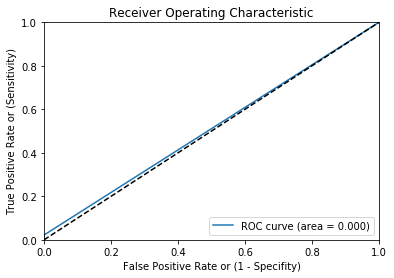

In [36]:
y_true=sorted(y_test)
y_score=sorted(predictions)
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(y_true, y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [37]:
#using ensemble method to check if accuaracy increase
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('rf',model1),('xgb', model2), ('gnb', model3), ('lr',model4),('knn',model5)], voting='hard')
model.fit(X_train,y_train)
accuracy = model.score(X_test,y_test)

C:\Users\Rahul-Akshay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.43%


In [39]:
#Creating the Classification_report
from sklearn.metrics import classification_report
# Model Prediction 
predictions = model.predict(X_test)
#Print the classification report
print(classification_report(y_true =y_test,y_pred = predictions))
np.sum(predictions)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7333
           1       0.65      0.48      0.55       905

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.79      0.72      0.75      8238
weighted avg       0.91      0.91      0.91      8238



663

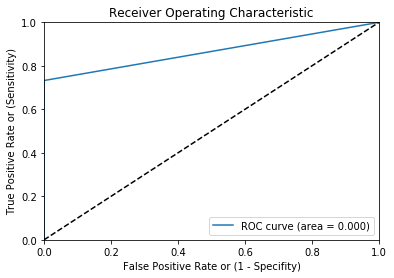

In [40]:
y_true=sorted(y_test)
y_score=sorted(predictions)
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(y_true, y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")